In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TRIAL 1 480.txt")

In [3]:
with open('TRIAL 1 450 ACT.txt') as f:
    lines = f.readlines()
#lines
# lines[1].index("\t")

98.92
['-0.21' '-2.56' '0.55' '0.85' '1.37' '1.88' '-0.29' '-0.11' '1.44'
 '-3.16' '-0.93' '-0.19' '0.1' '1.01' '1.77' '-2.76' '-0.9' '-3.09' '0.3'
 '-3.59' '-1.07' '2.15' '1.82' '0.82' '2.6' '-0.05' '1.24' '2.63' '4.53'
 '4.01' '4.1' '-0.63' '2.51' '0.62' '0.69' '3' '-0.25' '3.38' '7.62'
 '4.86' '0.85' '3.38' '3.66' '6.52' '5.33' '5.85' '6.55' '4.84' '4.61'
 '4.6' '3.12' '6.1' '4.52' '9.19' '10.43' '12.93' '10.5' '10.18' '11.68'
 '14.47' '13.09' '18.07' '20' '24.51' '36.04' '45.7' '58.93' '83' '106.83'
 '129.56' '139.32' '143.97' '143.89' '154.38' '164.48' '163.91' '177.1'
 '179.29' '194.61' '202.21' '198.55' '214.13' '222.43' '233.63' '239.61'
 '257.95' '258.66' '277.35' '280.61' '289.82' '295.37' '303.44' '322.19'
 '333.72' '330.7' '335.72' '340.69' '352.31' '356.01' '357.28' '364.05'
 '354.89' '374.2' '374.82' '386.81' '382.69' '383.72' '394.29' '385.85'
 '411.31' '395.57' '407.66' '408.27' '420.39' '437.11' '434.75' '443.95'
 '453.97' '467.82' '481.07' '501.14' '512.57' '521.14' '

/tmp/ipykernel_37533/2964747177.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(lam, inten.astype(np.float), 'r.')


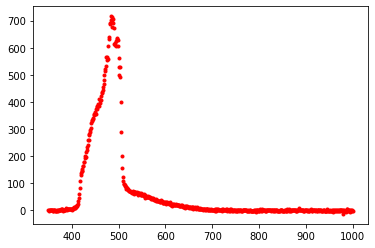

In [4]:
#start = lines.index('Capture_4')+1
data = lines[1:]
lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
inten = np.array([data[i][data[i].index("\t")+1:-2] for i in range(len(data))])
print(max(inten))
#print(lam[np.where(inten=='')], inten[np.where(inten!='')])
lam = lam[np.where(inten!='')]
inten = inten[np.where(inten!='')]

print(inten)
plt.plot(lam, inten.astype(np.float), 'r.')
# plt.plot(lam, inten, 'r.')

In [5]:
# SMOOTH
import numpy
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

In [6]:
plt.plot(lam, smooth(inten), "r.")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U10'), dtype('<U6')) -> None

In [7]:
max1 = max(inten)

In [8]:
lams = sorted(np.array([500, 480, 450, 520, 530, 550, 575, 565, 540, 585, 600]))
print(len(lams))
def get_inten(lamd):
    print(lamd)
    with open('TRIAL 1 ' + str(lamd) + '.txt') as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.title(f"Intensity vs. Wavelength for Slit at {lamd} nm")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity (Photon Counts)")
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam[index], inten[index], erri, errl

11


450


/tmp/ipykernel_37533/1112674374.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam = lam[np.where(inten!='')].astype(np.float)
/tmp/ipykernel_37533/1112674374.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inten = (inten[np.where(inten!='')].astype(np.float))


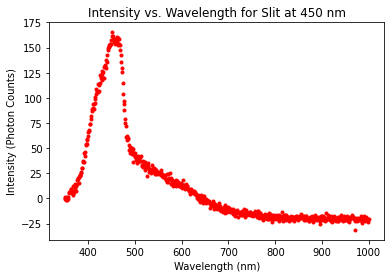

102
2.7290382921461576 20.493901531919196
480


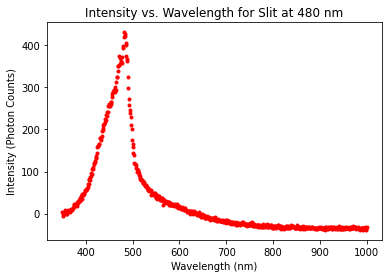

132
12.605003718761841 16.163229875244614
500


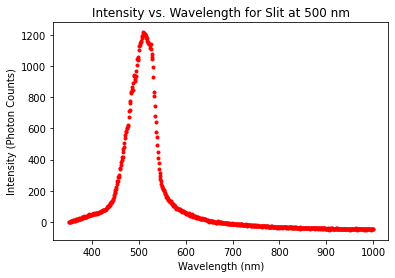

159
8.880431788488686 17.60681686165901
520


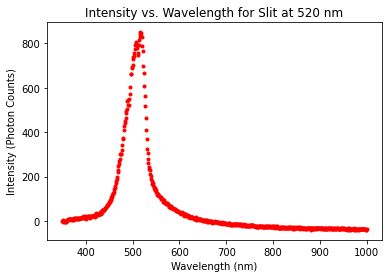

166
13.370430761572377 13.564659966250536
530


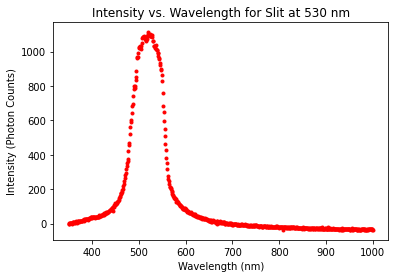

170
8.259229307265935 21.071307505705477
540


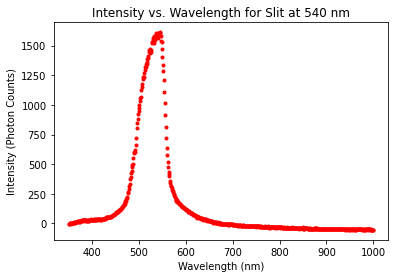

195
12.912609147650999 17.89553016817328
550


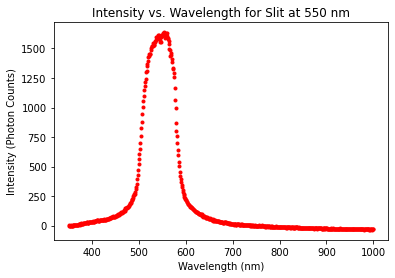

203
5.8223749449859445 21.64871050817269
565


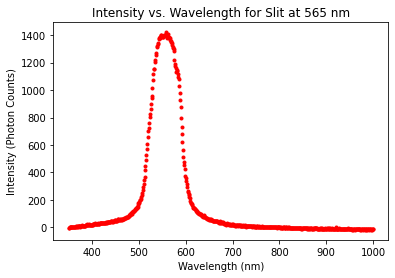

208
8.533716951012652 20.493901531919196
575


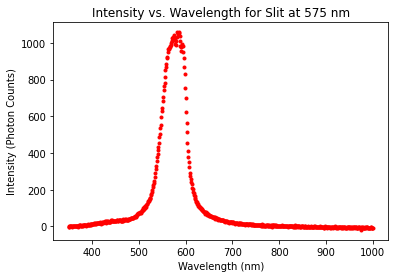

236
8.427664267162069 16.451950239004088
585


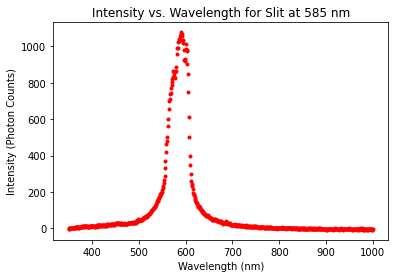

240
16.036948548586185 13.275918047351754
600


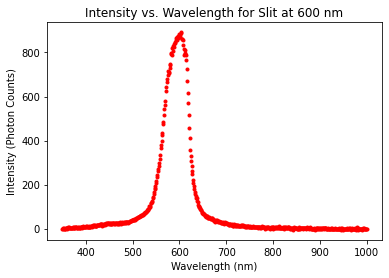

253
8.168024546975847 16.451950239004088


In [9]:
intensities = []
newlams = []
erri = []
errl = []
for lam in lams:
    getting = get_inten(lam)
    intensities.append(getting[1])
    newlams.append(getting[0])
    errl.append(getting[2])
    erri.append(getting[3])

In [10]:
intensities

[165.24,
 431.45,
 1218.01,
 849.47,
 1111.97,
 1612.38,
 1637.23,
 1420.99,
 1057.94,
 1077.58,
 892.04]

Text(0, 0.5, 'Flux (Photon Counts)')

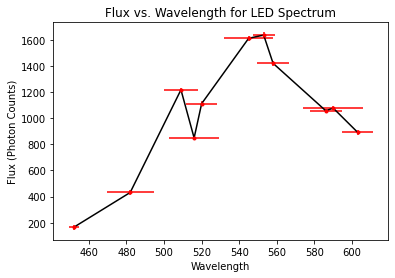

In [11]:
#plt.plot(newlams, intensities)

newlams, intensities = zip(*sorted(zip(newlams, intensities)))
plt.errorbar(newlams, intensities, xerr=errl, yerr=erri, fmt="r.")
plt.plot(newlams, intensities, "k")
plt.title("Flux vs. Wavelength for LED Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux (Photon Counts)")

In [12]:
from scipy import interpolate
print(len(newlams), len(intensities))
print(type(newlams[0]))
print(type(intensities))
print(np.transpose(np.array(newlams))[0])
f = interpolate.interp1d(np.transpose(np.array(newlams))[0], np.transpose(np.array(intensities))[0])

11 11
<class 'numpy.float64'>
<class 'tuple'>
452.0


TypeError: object of type 'numpy.float64' has no len()

11 11


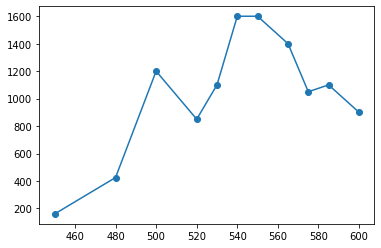

In [13]:
approx_inten = [160, 425, 1200, 850, 1100, 1600, 1600, 1400, 1050, 1100, 900]
print(len(lams), len(approx_inten))
plt.scatter(lams, approx_inten)
plt.plot(lams, approx_inten)

/tmp/ipykernel_37533/1437204390.py:9: RuntimeWarning: divide by zero encountered in power
  return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)
/tmp/ipykernel_37533/1437204390.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)
/tmp/ipykernel_37533/1437204390.py:9: RuntimeWarning: invalid value encountered in true_divide
  return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)


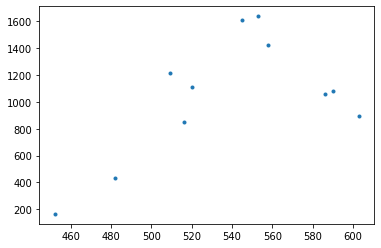

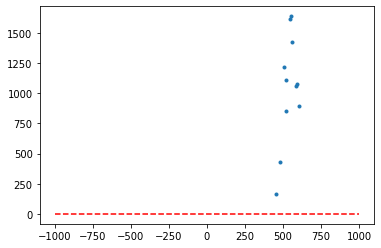

[ 6.0e-06  1.0e-02 -4.5e+00  6.0e-03]


/home/ayushmaan/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


11474.292255786651

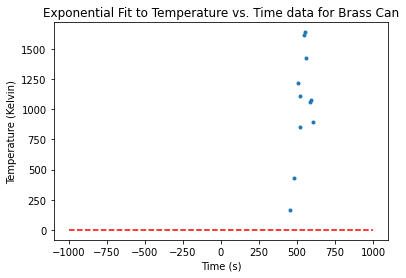

In [14]:
from scipy.optimize import curve_fit

x = np.array(newlams)
y = np.array(intensities)
xerr = np.array(errl)
yerr = np.array(erri)

def func(x, a, b, c, d):
     return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)
    
def func2(x, a, b, c, d):
     return (a*(x)**-5)/(np.exp(b/(x))-1)

xtest = np.linspace(-1000, 1000)
p0 = (6e-6, 0.01, -4.5, 0.008)
p0 = (6e-5, 0.01, 0, 0)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()

p0 = (6e-6, 0.01, -4.5, 0.006)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()


popt, pcov = curve_fit(func2, x, y,sigma=(yerr**2+xerr**2)**0.5, p0=p0)

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *popt), 'r--',
          label='fit: T = %5.3fexp(%5.3ft + %5.3ft + %5.3ft))' % tuple(popt))
plt.title("Exponential Fit to Temperature vs. Time data for Brass Can")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (Kelvin)")
#plt.text(165, 35, "K = 82.72 W/(m*K), \n Accepted Value: 111 W/(m*K)", fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))
# plt.legend()
print(popt)
np.sum((func(x, *popt) - y)**2/y)

In [15]:
# Load Full Blackbody Data
def get_inten(fn):
    print(fn)
    with open(fn) as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam, inten, errl, erri

blackbody test1.txt


/tmp/ipykernel_37533/160525332.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam = lam[np.where(inten!='')].astype(np.float)
/tmp/ipykernel_37533/160525332.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inten = (inten[np.where(inten!='')].astype(np.float))


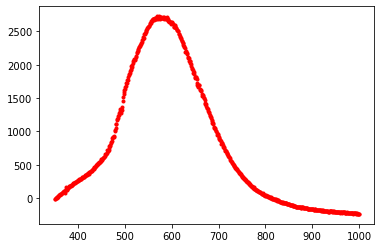

223
13.752749497827713 52.24940191045253


In [16]:
lam, inten, errl, erri = get_inten("blackbody test1.txt")

/tmp/ipykernel_37533/2846371146.py:9: RuntimeWarning: overflow encountered in exp
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)


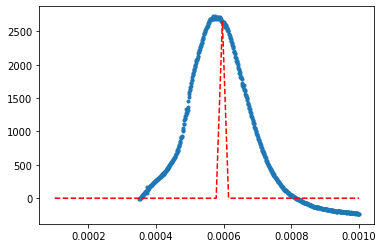

[ 3.e-24  1.e+00 -6.e-04  1.e+00]


/tmp/ipykernel_37533/2846371146.py:9: RuntimeWarning: divide by zero encountered in power
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_37533/2846371146.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/tmp/ipykernel_37533/2846371146.py:9: RuntimeWarning: invalid value encountered in true_divide
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)
/home/ayushmaan/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


nan

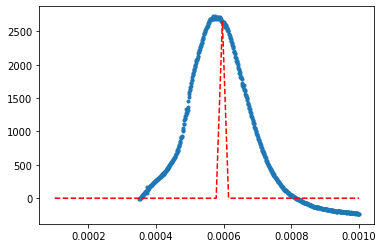

In [24]:
from scipy.optimize import curve_fit

x = np.array(lam/1e6)
y = np.array(inten)
# xerr = np.array(errl)
# yerr = np.array(erri)
    
def func2(x, a, b, c, d):
     return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)

xtest = np.linspace(0.0001, 0.001)
p0 = (3e-24, 1, -0.0006, 1)
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *p0), 'r--',
          label='ahhhhh')
plt.show()


popt, pcov = curve_fit(func2, x, y, p0=p0)

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *popt), 'r--',
          label='fit')
#plt.text(165, 35, "K = 82.72 W/(m*K), \n Accepted Value: 111 W/(m*K)", fontsize=10, bbox=dict(facecolor='none', edgecolor='black'))
# plt.legend()
print(popt)
np.sum((func2(x, *popt) - y)**2/y)

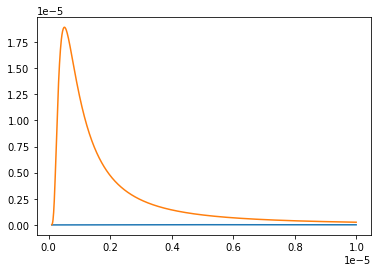

In [22]:
x_test = np.multiply(list(range(100, 10000, 10)), 1e-9)
for x in [1e3, 1e4]:
    y_pred_test = blackbody_func(x_test, 100, x)
    plt.plot(x_test, y_pred_test)

In [48]:
x_scaled = [val*1e-3 for val in x]

print(f"Estimated Temp: {2.897771e-3/573e-9}")

Estimated Temp: 5057.191972076789


[2.51924590e-05 7.63386692e+03]


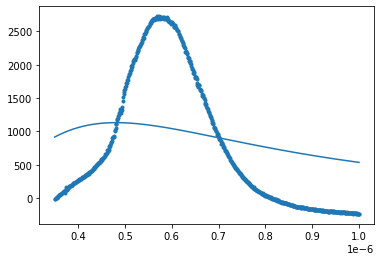

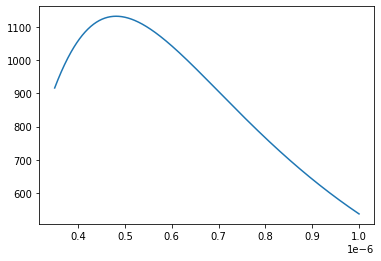

In [59]:
h = 6.626e-34
k = 1.380e-23
c = 3e8
def blackbody_func(wave, scale, T):
    freq = np.divide(c, wave)
    exp = np.exp((h*freq)/(k*T))
    return scale*(2*h*freq**3)/(c**2*(exp-1))


popt, pcov = curve_fit(blackbody_func, x_scaled, y, p0=[1e9, 5000], maxfev=10000000)
print(popt)
y_pred = blackbody_func(x_scaled, *popt)

plt.scatter(x_scaled, y,marker='.', label='Raw Data')
plt.plot(x_scaled, y_pred)
plt.show()

plt.plot(x_scaled, y_pred)


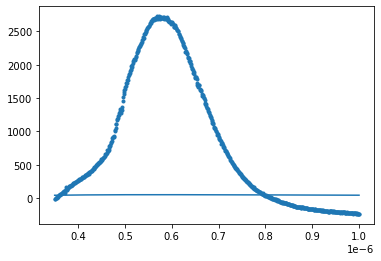

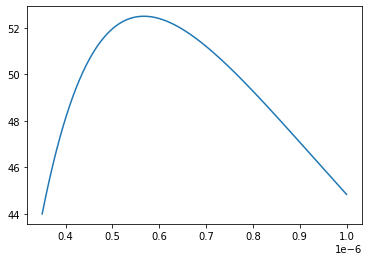

In [61]:
h = 6.626e-34
k = 1.380e-23
c = 3e8
def blackbody_func(wave, scale, T):
    freq = np.divide(c, wave)
    exp = np.exp((h*freq)/(k*T))
    return (scale*(2*h*(freq**3))/((c**2)*(exp-1)))**.5


y_pred = blackbody_func(x_scaled, 2e10, 9000)

plt.scatter(x_scaled, y,marker='.', label='Raw Data')
plt.plot(x_scaled, y_pred)
plt.show()

plt.plot(x_scaled, y_pred)


In [71]:
import pandas as pd
pd.DataFrame([x_scaled[i + 1] - x_scaled[i] for i in range(len(x_scaled)-1)]).describe()

,0
count,6.500000e+02
mean,1.000000e-09
std,6.943152e-23
min,1.000000e-09
25%,1.000000e-09
50%,1.000000e-09
75%,1.000000e-09
max,1.000000e-09


In [87]:
pd.DataFrame(x_scaled).describe()

,0
count,6.510000e+02
mean,6.750000e-07
std,1.880718e-07
min,3.500000e-07
25%,5.125000e-07
50%,6.750000e-07
75%,8.375000e-07
max,1.000000e-06


In [96]:


def fit_func(x, x_lst, y_lst):
    def helperClosest(x, lst):
        assert x >= min(lst) and x <= max(lst), f"x={x} is not in [{min(lst)},{max(lst)}]"
        range_lst = max(lst) - min(lst)
        x = x - min(lst)
        low_index = int(x//1e-9)
        high_index = low_index + 1
        print(lst[low_index], lst[high_index])
        return low_index, high_index
    def helperFarthest(x):
        a, b = helperClosest(x, x_lst)
        b_weight = (x-x_lst[a])/(x_lst[b]-x_lst[a])
        a_weight = 1 - b_weight
        print(a_weight, b_weight)
        return a_weight*y_lst[a] + b_weight*y_lst[b]
    if (type(x)==type([])):
        return [helperFarthest(val) for val in x]
    return helperFarthest(x)

In [81]:
interpolate(572.5e-9, x_scaled, y)

5.72e-07 5.730000000000001e-07
0.5 0.5


2723.7

In [73]:
a, b = closest_two_indices(573e-9, x_scaled)
print(x_scaled[int(a)], x_scaled[int(b)])

5.72e-07 5.730000000000001e-07


3.99e-07 4.0000000000000003e-07
5.295763827461997e-14 0.999999999999947
4.1e-07 4.11e-07
1.0 0.0
4.2e-07 4.2099999999999997e-07
1.0 0.0
4.3e-07 4.3100000000000003e-07
1.0 0.0
4.4e-07 4.41e-07
1.0 0.0
4.5e-07 4.51e-07
0.999999999999947 5.29395592033926e-14
4.59e-07 4.6000000000000004e-07
5.295763827461997e-14 0.999999999999947
4.7e-07 4.71e-07
1.0 0.0
4.800000000000001e-07 4.81e-07
1.0 0.0
4.89e-07 4.9e-07
0.0 1.0
4.99e-07 5e-07
0.0 1.0
5.09e-07 5.100000000000001e-07
1.0591527654923993e-13 0.9999999999998941
5.2e-07 5.21e-07
1.0 0.0
5.3e-07 5.31e-07
1.0 0.0
5.4e-07 5.410000000000001e-07
1.0 0.0
5.5e-07 5.51e-07
1.0 0.0
5.599999999999999e-07 5.61e-07
0.9999999999998941 1.0587911840677959e-13
5.699999999999999e-07 5.71e-07
0.9999999999998941 1.0587911840677959e-13
5.800000000000001e-07 5.81e-07
1.0 0.0
5.89e-07 5.900000000000001e-07
1.0591527654923993e-13 0.9999999999998941
5.99e-07 6e-07
0.0 1.0
6.09e-07 6.1e-07
0.0 1.0
6.19e-07 6.2e-07
0.0 1.0
6.3e-07 6.310000000000001e-07
1.0 0.0
6.4e-

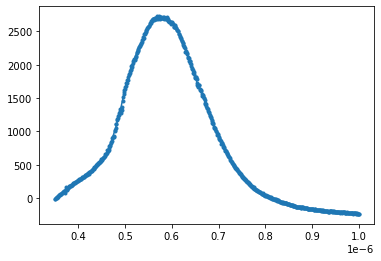

In [95]:
plt.scatter(x_scaled, y,marker='.', label='Raw Data')
x_test = np.multiply(1e-8, list(range(40, 100)))
plt.plot(x_test, fit_func(x_test, x_scaled, y))
plt.show()

In [100]:
import pickle
data_dict = {"x": x_scaled,
            "y": y}
with open(f"pickled_fit", 'wb') as file:
    pickle.dump(data_dict, file=file)

#### def blackbody_lam(lam, T, d=0):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / ((lam+d)**5 * (np.exp(h*c / ((lam+d)*k*T)) - 1))

plt.plot(x, y, ':', lw=2, label='T1')
x = np.array(lam)
def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)


popt, pcov = curve_fit(blackbody_lam, x, y, p0=(1000, 3000))

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(x, bestT1) + blackbody_lam(x, bestT2)


degrees_of_freedom = len(x) - 2
resid = (y - func(x, *popt))
chisq = np.dot(resid, resid)

# plot the solution

plt.plot(x, ybest, label='Best fitting\nmodel')
plt.legend(frameon=False)
plt.savefig('fit_bb.png')
plt.show()

In [ ]:
#irdk what's going on. Trying a gaussian fit.